In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Loading the data
data = pd.read_csv('./resources/StudentPerformanceFactors.csv')

# Also available on Kaggle
# https://www.kaggle.com/code/rishisharmapro/linear-regression-vs-knn-regressor

# Exploring the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


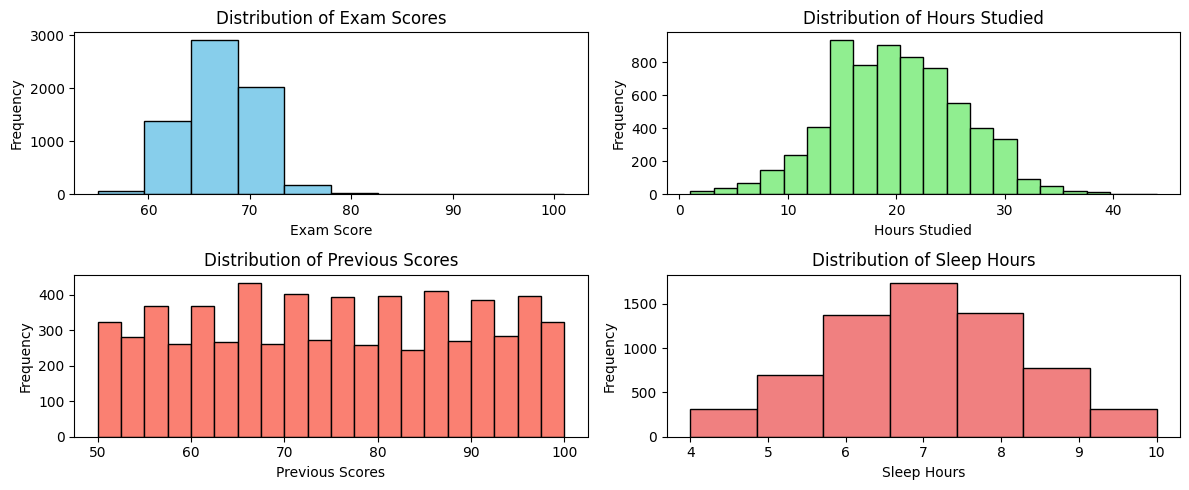

In [6]:
# Splitting the data and analysing the data

X = data[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

fig, ax = plt.subplots(2, 2, figsize=(12, 5))

# Exam Score Distribution
ax[0, 0].hist(data['Exam_Score'], bins=10, color='skyblue', edgecolor='black')
ax[0, 0].set_xlabel("Exam Score")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].set_title("Distribution of Exam Scores")

# Hours Studied Distribution
ax[0, 1].hist(data['Hours_Studied'], bins=20, color='lightgreen', edgecolor='black')
ax[0, 1].set_xlabel("Hours Studied")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].set_title("Distribution of Hours Studied")

# Previous Scores Distribution
ax[1, 0].hist(data['Previous_Scores'], bins=20, color='salmon', edgecolor='black')
ax[1, 0].set_xlabel("Previous Scores")
ax[1, 0].set_ylabel("Frequency")
ax[1, 0].set_title("Distribution of Previous Scores")

# Sleep Hours Distribution
ax[1, 1].hist(data['Sleep_Hours'], bins=7, color='lightcoral', edgecolor='black')
ax[1, 1].set_xlabel("Sleep Hours")
ax[1, 1].set_ylabel("Frequency")
ax[1, 1].set_title("Distribution of Sleep Hours")


plt.tight_layout()
plt.show()


Mean Absolute Error: 2.406
Mean Squared Error: 9.590
Root Mean Squared Error: 3.097
R^2 Score: 0.287


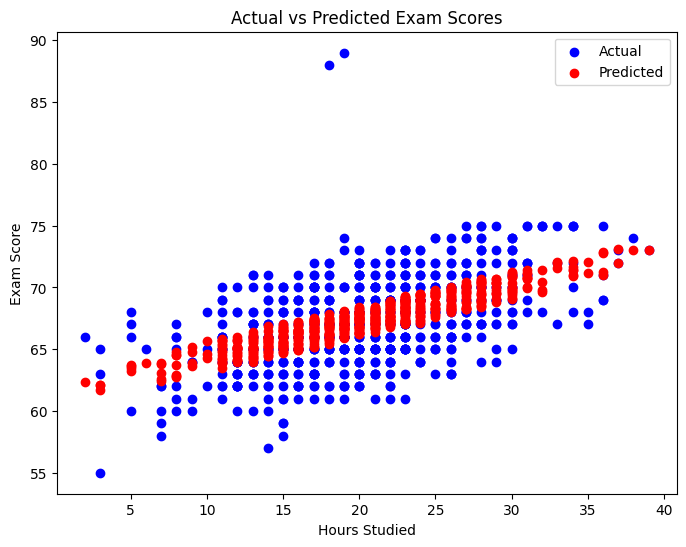

In [7]:
# Linear Regression Model - Using Single Feature
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Scatter Plot + Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours_Studied'], y_pred, color='red', label='Predicted')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()


Mean Absolute Error: 2.448
Mean Squared Error: 9.985
Root Mean Squared Error: 3.160
R^2 Score: 0.258


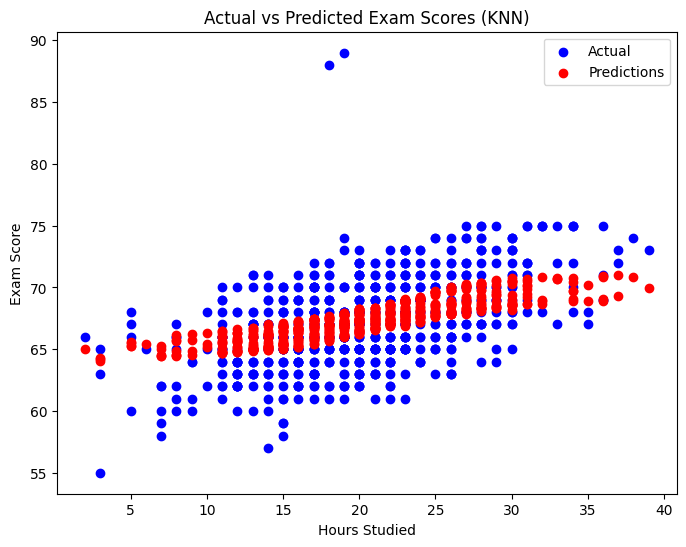

In [8]:
# KNN Regressor - Using Single Feature
model = KNeighborsRegressor(n_neighbors=400)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Scatter Plot + KNN Predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours_Studied'], y_pred, color='red', label='Predictions')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores (KNN)")
plt.legend()
plt.show()


Mean Absolute Error: 0.525
Mean Squared Error: 3.362
Root Mean Squared Error: 1.834
R^2 Score: 0.762


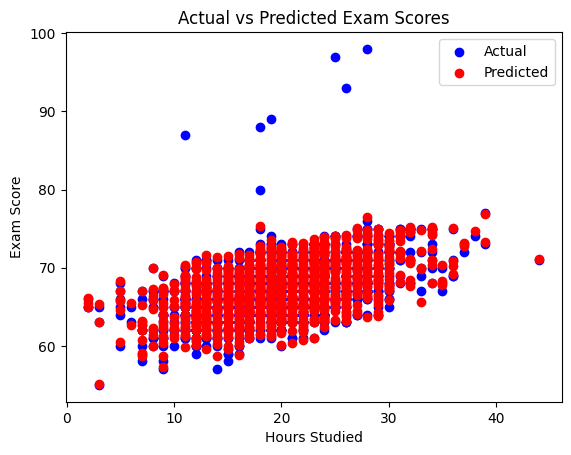

In [9]:
# Linear Regression Model - Using Multiple Features

# Selecting numerical and categorical features
numerical_features = ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Attendance', 'Tutoring_Sessions', 'Physical_Activity']
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                         'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                           'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level']

X = data[numerical_features + categorical_features]
y = data['Exam_Score']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Scatter Plot + Regression Line
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours_Studied'], y_pred, color='red', label='Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.show()

Mean Absolute Error: 1.303
Mean Squared Error: 5.238
Root Mean Squared Error: 2.289
R^2 Score: 0.629


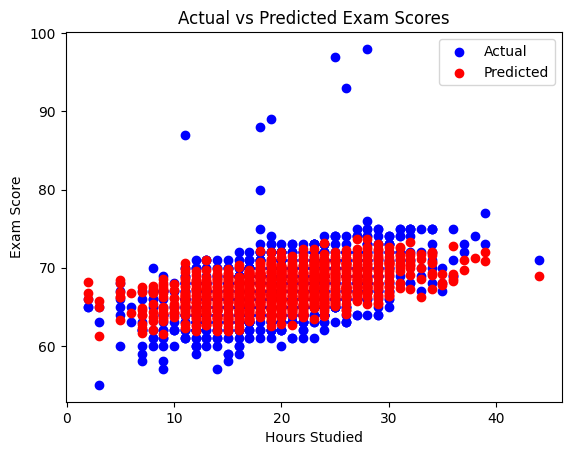

In [10]:
# KNN Regressor Model - Using Multiple Features

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=20))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Scatter Plot + Regression Line
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours_Studied'], y_pred, color='red', label='Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.show()